In [54]:
# Let’s start by importing some libraries.
%matplotlib inline
import numpy as np
import pandas as pd
import math
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [55]:
#importar la data como DataFrame
data = pd.read_excel(r'C:Yura_all.xlsx')
# Mostar tabla de datos
print("_____ Datos medidos _____")
data

_____ Datos medidos _____


,timestamp,G,v,dir_v,Ta,Tc
0,01/01/2021_00:10:00.000,0.0,3.4,46.0,24.5,23.6
1,01/01/2021_00:15:00.000,NaN,NaN,NaN,NaN,NaN
2,01/01/2021_00:20:00.000,0.0,3.4,35.1,24.5,23.4
3,01/01/2021_00:30:00.000,0.0,1.1,28.3,24.5,23.5
4,01/01/2021_00:40:00.000,0.0,3.4,55.5,24.6,23.3
...,...,...,...,...,...,...
155635,15/06/2022_11:10:00.000,771.4,1.8,127.8,33.0,51.8
155636,15/06/2022_11:20:00.000,771.4,1.8,127.8,33.0,51.8
155637,15/06/2022_11:30:00.000,771.4,1.8,127.8,33.0,51.8
155638,15/06/2022_11:40:00.000,771.4,1.8,127.8,33.0,51.8


In [56]:
# Remover las filas con NaN
data = data.dropna()
print("Tabla después de remover las filas con NaN:")
data

Tabla después de remover las filas con NaN:


,timestamp,G,v,dir_v,Ta,Tc
0,01/01/2021_00:10:00.000,0.0,3.4,46.0,24.5,23.6
2,01/01/2021_00:20:00.000,0.0,3.4,35.1,24.5,23.4
3,01/01/2021_00:30:00.000,0.0,1.1,28.3,24.5,23.5
4,01/01/2021_00:40:00.000,0.0,3.4,55.5,24.6,23.3
6,01/01/2021_00:50:00.000,0.0,3.4,41.0,24.5,23.3
...,...,...,...,...,...,...
155635,15/06/2022_11:10:00.000,771.4,1.8,127.8,33.0,51.8
155636,15/06/2022_11:20:00.000,771.4,1.8,127.8,33.0,51.8
155637,15/06/2022_11:30:00.000,771.4,1.8,127.8,33.0,51.8
155638,15/06/2022_11:40:00.000,771.4,1.8,127.8,33.0,51.8


In [57]:
# ver la dimensión de la data
shape = data.shape
print("La data ANTES de filtrar las radiaciones contiene {} filas y {} columnas".format(shape[0],shape[1]))

# filtra datos de G mayores de cero
data = data.drop(data[data['G']<=0].index)
# View the shape of the data frame.
shape = data.shape
print("La data DESPUÉS de filtrar G>0 contiene {} filas y {} columnas".format(shape[0],shape[1]))

# filtra datos G<1200
data = data.drop(data[data['G']>=1500].index)
# View the shape of the data frame.
shape = data.shape
print("La data DESPUÉS de filtrar G<1200 contiene {} filas y {} columnas".format(shape[0],shape[1]))

# filtra datos Tc<60
data = data.drop(data[data['Tc']>=60].index)
# View the shape of the data frame.
shape = data.shape
print("La data DESPUÉS de filtrar Tc<60 contiene {} filas y {} columnas".format(shape[0],shape[1]))

# filtra datos Ta<40
data = data.drop(data[data['Ta']>40].index)
# View the shape of the data frame.
shape = data.shape
print("La data DESPUÉS de filtrar Ta<40 contiene {} filas y {} columnas".format(shape[0],shape[1]))

La data ANTES de filtrar las radiaciones contiene 140661 filas y 6 columnas
La data DESPUÉS de filtrar G>0 contiene 75858 filas y 6 columnas
La data DESPUÉS de filtrar G<1200 contiene 75855 filas y 6 columnas
La data DESPUÉS de filtrar Tc<60 contiene 75808 filas y 6 columnas
La data DESPUÉS de filtrar Ta<40 contiene 75807 filas y 6 columnas


In [58]:
# Breve resumen estadístico
# View the statistical description of the dataset which includes the total count of each column
# mean of all values, standard deviation, minimum, maximum values, 
# and 25th, 50th, 75th per cent values of the dataset.
print("_____________ Breve resumen estadístico ____________")
data.describe()

_____________ Breve resumen estadístico ____________


,G,v,dir_v,Ta,Tc
count,75807.000000,75807.000000,75807.000000,75807.000000,75807.000000
mean,432.363586,3.244149,84.900212,29.057456,34.581047
std,346.320617,1.886973,64.283357,2.882835,7.878352
min,5.000000,0.000000,1.500000,0.000000,9.800000
25%,102.100000,1.800000,46.900000,27.400000,27.600000
50%,372.400000,3.400000,69.000000,29.200000,34.500000
75%,733.300000,4.100000,94.600000,31.100000,40.400000
max,1421.000000,12.500000,359.400000,38.500000,59.800000


In [59]:
# Asignar variables a las columnas de la data
G = data.iloc[:, 1] # G
v = data.iloc[:, 2]  # v
vdir = data.iloc[:, 3]  # Tc
Ta = data.iloc[:, 4] # Ta
Tc = data.iloc[:, 5]  # Tc

In [60]:
# calcular regresión lineal múltiple según Numpy
# en Matlab se obtiene Tc = 1.5334*Ta + 0.025523*G - 0.84643*v - 14.089
y = Tc 
x = [Ta, G, v]
x = np.transpose(x) # transpose so input vectors
x = np.c_[x, np.ones(x.shape[0])]  # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
# imprimir valores de los coeficientes
print("Valor de Ta: ",linreg[:1])
print("Valor de G:  ",linreg[1:2])
print("Valor de v:  ",linreg[2:3])
print("Valor const: ",linreg[3:4])

Valor de Ta:  [1.50994568]
Valor de G:   [0.0112668]
Valor de v:   [-0.28243679]
Valor const:  [-13.24922122]


In [61]:
"""
Resultados obtenidos en el Matlab

Linear regression model:
    Tc ~ 1 + Ta + G + v

Estimated Coefficients:
                   Estimate        SE         tStat       pValue   
                   ________    __________    _______    ___________

    (Intercept)     -14.089       0.48408    -29.104    1.7169e-179
    Ta               1.5334      0.018354     83.545              0
    G              0.025523    0.00014976     170.42              0
    v              -0.84643      0.025858    -32.734    2.1796e-224


Number of observations: 11050, Error degrees of freedom: 11046
Root Mean Squared Error: 3.59
R-squared: 0.907,  Adjusted R-Squared: 0.907
F-statistic vs. constant model: 3.57e+04, p-value = 0
"""
y = Tc 
X = [Ta, G, v]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, X).summary())

                            OLS Regression Results                            
Dep. Variable:                     Tc   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.335e+05
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:29:20   Log-Likelihood:            -1.9437e+05
No. Observations:               75807   AIC:                         3.888e+05
Df Residuals:                   75803   BIC:                         3.888e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2824      0.007    -42.898      0.0

In [62]:
# datos de catálogo STC y NOCT del módulo FV - HEE215MA68
G_noct = 800 # W/m2
T_noct = 45 # °C
Ta_noct = 20 # °C
n_stc = 15.03/100
Beta_stc = -0.34/100
T_stc = 25

# parámetros
Uo = 30.02
U1 = 6.28
UL = (G_noct*0.9)/(T_noct-Ta_noct)

In [63]:
# Calular Tc según los modelos seleccionados

# 1 Ross & Smokler - (Ross and Smokler, 1986) 
Tc_Std = Ta+(G/G_noct)*(T_noct-Ta_noct)

# 2 Eckstein (1990)
Tc_Eckstein = Ta+(G*0.9/UL)*(1-n_stc/0.9)

# 3 King et al. (2004) 	
Tc_King = Ta+G*np.exp((-3.473-0.0594*v))

# 4 Mattei1
Upv_Mattei1 = 26.6+2.3*v
Tc_Mattei1 = (Upv_Mattei1*Ta+G*(0.81-n_stc*(1-Beta_stc*T_stc)))/(Upv_Mattei1+Beta_stc*n_stc*G)

# 5 Mattei2
Upv_Mattei2 = 24.1 + 2.9*v
Tc_Mattei2 = (Upv_Mattei2*Ta+G*(0.81-n_stc*(1-Beta_stc*T_stc)))/(Upv_Mattei2+Beta_stc*n_stc*G)

# 6 Tc_Faiman
Tc_Faiman = Ta + (G/(Uo + U1*v))

# 7 Skoplaki2 (2008)
hw_Sko2 = 8.91 + 2*v
hw_noct_Sko2 = 8.91 + 2
Tc_Sko2 = Ta+(G/G_noct)*(T_noct-Ta_noct)*hw_noct_Sko2/hw_Sko2*(1-n_stc/0.9*1-Beta_stc*T_stc)

# 8 Duffie and Beckman (2013)
Tc_Duffie = Ta+(G/G_noct)*(9.5/(5.7 + 3.8*v))*(T_noct-Ta_noct)*(1-n_stc/0.9)

# 10 Skoplaki3 (2008)
Tc_Sko3 = Ta+(0.32/(8.91+2.0*v))*G

In [64]:
# guardar los resultados en un arreglo y hallar la transpuesta
results_Tc_all = np.transpose([Tc, Tc_Std, Tc_Eckstein, Tc_King, Tc_Mattei1, Tc_Mattei2, 
                               Tc_Faiman, Tc_Sko2, Tc_Duffie, Tc_Sko3])
# definir los nombres de las columnas
columnas = ['Tc_med','Ross&Smokler','Eckstein','King','Mattei1','Mattei2','Faiman',
            'Skoplaki2','Duffie&Beckman','Skoplaki3']# esta lista también podría ser un array de NumPy
# guardo en Frame de Panda con nombre de la columna
results_Tc_all = pd.DataFrame(results_Tc_all, columns = columnas)
#  definir la presición de los resultados a mostrar
#  pd.set_option('display.float_format','{:.4f} ºC'.format) # 4 cifras decimales
# mostrar la tabla Dataframe
print("_________________________________ Tc(ºC) exp. y sim. por los modelos __________________________________")
results_Tc_all

_________________________________ Tc(ºC) exp. y sim. por los modelos __________________________________


,Tc_med,Ross&Smokler,Eckstein,King,Mattei1,Mattei2,Faiman,Skoplaki2,Duffie&Beckman,Skoplaki3
0,23.1,24.73750,24.697837,24.702040,24.653848,24.658420,24.663977,24.668579,24.620633,24.672360
1,22.5,24.66250,24.568563,24.578515,24.464324,24.475151,24.488366,24.499267,24.385709,24.508221
2,22.8,26.68750,26.372287,26.268805,25.906685,25.907916,25.883058,25.904853,25.501914,25.929632
3,24.0,26.78125,26.500481,26.463853,26.132045,26.146036,26.147263,26.171824,25.814531,26.195863
4,25.3,30.86250,30.050463,30.337806,29.350529,29.513240,29.765366,29.892869,29.068532,29.980176
...,...,...,...,...,...,...,...,...,...,...
75802,51.8,57.10625,53.080506,54.505034,49.873709,50.702058,51.667118,52.299221,48.212505,52.732054
75803,51.8,57.10625,53.080506,54.505034,49.873709,50.702058,51.667118,52.299221,48.212505,52.732054
75804,51.8,57.10625,53.080506,54.505034,49.873709,50.702058,51.667118,52.299221,48.212505,52.732054
75805,51.8,57.10625,53.080506,54.505034,49.873709,50.702058,51.667118,52.299221,48.212505,52.732054


In [65]:
# Calcular los indicadores de precisión de los modelos

# calcular R2
corr_Tc = np.corrcoef(Tc, Tc_Std); corr = corr_Tc[0,1]; R2_Tc_Std = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Eckstein); corr = corr_Tc[0,1]; R2_Tc_Eckstein = corr**2
corr_Tc = np.corrcoef(Tc, Tc_King); corr = corr_Tc[0,1]; R2_Tc_King = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Mattei1); corr = corr_Tc[0,1]; R2_Tc_Mattei1 = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Mattei2); corr = corr_Tc[0,1]; R2_Tc_Mattei2 = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Faiman); corr = corr_Tc[0,1]; R2_Tc_Faiman = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Sko2); corr = corr_Tc[0,1]; R2_Tc_Sko2 = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Duffie); corr = corr_Tc[0,1]; R2_Tc_Duffie = corr**2
corr_Tc = np.corrcoef(Tc, Tc_Sko3); corr = corr_Tc[0,1]; R2_Tc_Sko3 = corr**2

R2_all = [R2_Tc_Std, R2_Tc_Eckstein, R2_Tc_King, R2_Tc_Mattei1, R2_Tc_Mattei2,
           R2_Tc_Faiman, R2_Tc_Sko2, R2_Tc_Duffie, R2_Tc_Sko3]

# calcular RMSE
RMSE_Tc_Std = sqrt(mean_squared_error(Tc, Tc_Std))
RMSE_Tc_Eckstein = sqrt(mean_squared_error(Tc, Tc_Eckstein))
RMSE_Tc_King = sqrt(mean_squared_error(Tc, Tc_King))
RMSE_Tc_Mattei1 = sqrt(mean_squared_error(Tc, Tc_Mattei1))
RMSE_Tc_Mattei2 = sqrt(mean_squared_error(Tc, Tc_Mattei2))
RMSE_Tc_Faiman = sqrt(mean_squared_error(Tc, Tc_Faiman))
RMSE_Tc_Sko2 = sqrt(mean_squared_error(Tc, Tc_Sko2))
RMSE_Tc_Duffie = sqrt(mean_squared_error(Tc, Tc_Duffie))
RMSE_Tc_Sko3 = sqrt(mean_squared_error(Tc, Tc_Sko3))

RMSE_all = [RMSE_Tc_Std, RMSE_Tc_Eckstein, RMSE_Tc_King, RMSE_Tc_Mattei1, RMSE_Tc_Mattei2, 
            RMSE_Tc_Faiman, RMSE_Tc_Sko2,RMSE_Tc_Duffie, RMSE_Tc_Sko3]

#calcular MAE
MAE_Tc_Std = mean_absolute_error(Tc, Tc_Std)
MAE_Tc_Eckstein = mean_absolute_error(Tc, Tc_Eckstein)
MAE_Tc_King = mean_absolute_error(Tc, Tc_King)
MAE_Tc_Mattei1 = mean_absolute_error(Tc, Tc_Mattei1)
MAE_Tc_Mattei2 = mean_absolute_error(Tc, Tc_Mattei2)
MAE_Tc_Faiman = mean_absolute_error(Tc, Tc_Faiman)
MAE_Tc_Sko2 = mean_absolute_error(Tc, Tc_Sko2)
MAE_Tc_Duffie = mean_absolute_error(Tc, Tc_Duffie)
MAE_Tc_Sko3= mean_absolute_error(Tc, Tc_Sko3)

MAE_all = [MAE_Tc_Std, MAE_Tc_Eckstein, MAE_Tc_King, MAE_Tc_Mattei1, MAE_Tc_Mattei2,
           MAE_Tc_Faiman, MAE_Tc_Sko2, MAE_Tc_Duffie, MAE_Tc_Sko3]

# guardo los errores en un arreglo y hallo la transpuesta
error_Tc_all = np.transpose([R2_all, RMSE_all, MAE_all])
# defino los nombres de las filas
filas = ['Ross & Smokler','Eckstein','King','Mattei1','Mattei2','Faiman',
            'Skoplaki2','Duffie & Beckman','Skoplaki3']# esta lista también podría ser un array de NumPy
# defino los nombres de las columnas
columnas = ['R2','RMSE (ºC)','MAE (ºC)']# esta lista también podría ser un array de NumPy
# guardo en Frame de Panda con nombre de la columna
error_Tc_all = pd.DataFrame(error_Tc_all, columns=columnas, index=filas)
# muestro tabla de resultados
print("___ Tabla con errores de los modelos ___")
error_Tc_all

___ Tabla con errores de los modelos ___


,R2,RMSE (ºC),MAE (ºC)
Ross & Smokler,0.760631,10.665273,8.353523
Eckstein,0.774112,7.974248,6.227979
King,0.794938,7.242544,5.752938
Mattei1,0.813812,4.660973,3.639154
Mattei2,0.811438,4.794407,3.740141
Faiman,0.798476,4.899312,3.766947
Skoplaki2,0.793032,5.143154,3.945634
Duffie & Beckman,0.697530,4.532056,3.010251
Skoplaki3,0.791168,5.335695,4.100067


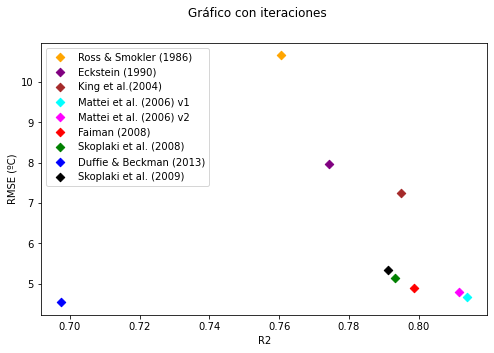

In [67]:
# Graficar errores RMSE vs R2
legendas = ['Ross & Smokler (1986)','Eckstein (1990)','King et al.(2004)',
    'Mattei et al. (2006) v1','Mattei et al. (2006) v2','Faiman (2008)',
    'Skoplaki et al. (2008)','Duffie & Beckman (2013)','Skoplaki et al. (2009)']# esta lista también podría ser un array de NumPy
colors_set = np.array(["orange","purple","brown","cyan","magenta","red","green","blue","black"])
plt.figure(figsize=(8,5))
plt.suptitle('Gráfico con iteraciones')
for i in range(len(R2_all)):
    plt.scatter(R2_all[i], RMSE_all[i], marker="D", label=legendas[i], c=colors_set[i])
    plt.xlabel('R2')
    plt.ylabel('RMSE (ºC)')
    # Add legend
    plt.legend(legendas, loc='best')
    # Display
plt.show()

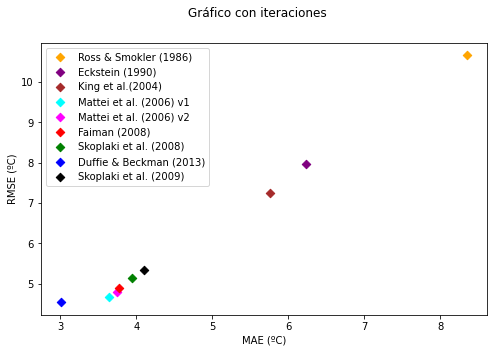

In [68]:
# Graficar errores RMSE vs MAE
legendas = ['Ross & Smokler (1986)','Eckstein (1990)','King et al.(2004)',
    'Mattei et al. (2006) v1','Mattei et al. (2006) v2','Faiman (2008)',
    'Skoplaki et al. (2008)','Duffie & Beckman (2013)','Skoplaki et al. (2009)']# esta lista también podría ser un array de NumPy
colors_set = np.array(["orange","purple","brown","cyan","magenta","red","green","blue","black"])
plt.figure(figsize=(8,5))
plt.suptitle('Gráfico con iteraciones')
for i in range(len(MAE_all)):
    plt.scatter(MAE_all[i], RMSE_all[i], marker="D", label=legendas[i], c=colors_set[i])
    plt.xlabel('MAE (ºC)')
    plt.ylabel('RMSE (ºC)')
    # Add legend
    plt.legend(legendas, loc='best')
    # Display
plt.show()